# Country_wide_COVID 19_Datasets 

In [211]:
#data analysis and wrangling
import pandas as pd
import numpy as np

#visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

#model developing-machine learning
import sklearn
from scipy.stats import zscore                                                          #for removing the outliers
from sklearn.preprocessing import StandardScaler                                        #for standardizing the input dataset
from sklearn.model_selection import train_test_split                                    #to train the model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error                                 #for reporting purposes

#boosting techniques
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

#saving the model using joblib
import pickle
#for filtering the warnings
import warnings
warnings.filterwarnings("ignore")

In [154]:
#acquiring the train data
covid_df=pd.read_csv("COVID19_worldwide")
covid_df1=pd.read_csv("population_structure_by_age_per_contry.csv")

In [155]:
print(covid_df.shape)

(6603, 9)


In [156]:
covid_df1.shape

(213, 4)

In [157]:
covid_df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [158]:
covid_df1.head()

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185


In [159]:
covid_df['Country'].value_counts()

Denmark             31
San Marino          31
Burkina Faso        31
Gambia              31
Papua New Guinea    31
                    ..
Azerbaijan          31
Ukraine             31
Liechtenstein       31
Kyrgyzstan          31
Eswatini            31
Name: Country, Length: 213, dtype: int64

In [160]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 6603 non-null   object 
 1   Country              6603 non-null   object 
 2   Population           6603 non-null   int64  
 3   Total Tests          5505 non-null   float64
 4   Total Cases          6554 non-null   float64
 5   Total Deaths         5367 non-null   float64
 6   Total Recovered      6318 non-null   float64
 7   Serious or Critical  4117 non-null   float64
 8   Active Cases         6544 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 464.4+ KB


In [161]:
covid_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   213 non-null    object 
 1   Fraction age 0-14 years   176 non-null    float64
 2   Fraction age 15-64 years  176 non-null    float64
 3   Fraction age 65+ years    176 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.8+ KB


In [162]:
covid_df.isnull().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

In [163]:
#imputer functions(handling null values)
covid_df['Total Tests'].fillna(covid_df['Total Tests'].mean(),inplace=True)
covid_df['Total Cases'].fillna(covid_df['Total Cases'].mean(),inplace=True)
covid_df['Total Deaths'].fillna(covid_df['Total Deaths'].mean(),inplace=True)
covid_df['Total Recovered'].fillna(covid_df['Total Recovered'].mean(),inplace=True)
covid_df['Serious or Critical'].fillna(covid_df['Serious or Critical'].mean(),inplace=True)
covid_df['Active Cases'].fillna(covid_df['Active Cases'].mean(),inplace=True)
#-----------------------------------------------------------------------------------------------------
covid_df1['Fraction age 0-14 years'].fillna(covid_df1['Fraction age 0-14 years'].mean(),inplace=True)
covid_df1['Fraction age 15-64 years'].fillna(covid_df1['Fraction age 15-64 years'].mean(),inplace=True)
covid_df1['Fraction age 65+ years'].fillna(covid_df1['Fraction age 65+ years'].mean(),inplace=True)

In [164]:
covid_df.describe()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
count,6.603000e+03,6.603000e+03,6.603000e+03,6603.000000,6603.000000,6603.000000,6.603000e+03
mean,3.637913e+07,2.167252e+05,1.692968e+04,1416.252096,5855.424185,386.748360,9.964142e+03
std,1.411537e+08,6.934856e+05,8.828521e+04,5990.992214,22955.519135,1309.473245,6.511732e+04
min,8.010000e+02,1.000000e+01,1.000000e+00,0.000000,1.000000,1.000000,0.000000e+00
25%,8.672680e+05,4.733000e+03,8.000000e+01,8.000000,29.000000,7.000000,2.700000e+01
50%,6.859926e+06,5.419500e+04,6.320000e+02,55.000000,253.000000,137.000000,2.840000e+02
75%,2.546422e+07,2.167252e+05,5.222500e+03,1416.252096,1786.500000,386.748360,2.230500e+03
max,1.439324e+09,1.230074e+07,1.550294e+06,91981.000000,356383.000000,18671.000000,1.101930e+06


In [165]:
#converting sting data to int or float data using label encoder
from sklearn.preprocessing import LabelEncoder
le_x = LabelEncoder() 
for col in covid_df.columns:
    covid_df[col] = le_x.fit_transform(covid_df[col])

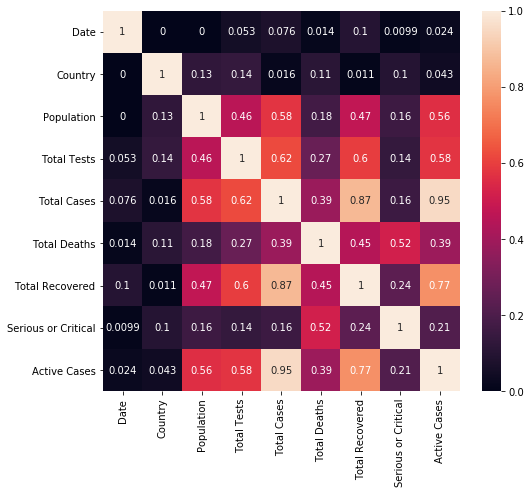

In [166]:
#checking for the correlation
corr_hmap=covid_df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)

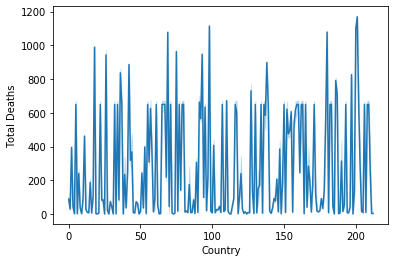

In [167]:
sns.lineplot(data=covid_df,x='Country',y='Total Deaths')

In [168]:
#converting sting data to int or float data using label encoder
for col in covid_df1.columns:
    covid_df1[col] = le_x.fit_transform(covid_df1[col])

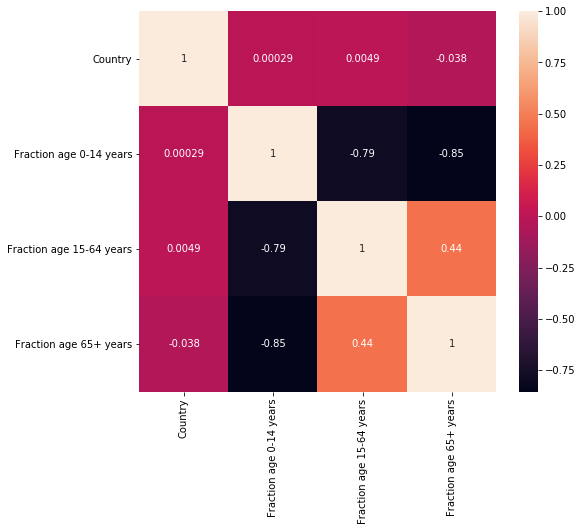

In [169]:
#checking for the correlation
corr_hmap=covid_df1.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)

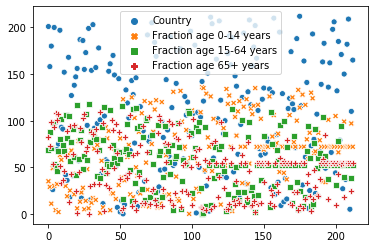

In [170]:
sns.scatterplot(data=covid_df1)

In [171]:
covid_df1.columns

Index(['Country', 'Fraction age 0-14 years', 'Fraction age 15-64 years',
       'Fraction age 65+ years'],
      dtype='object')

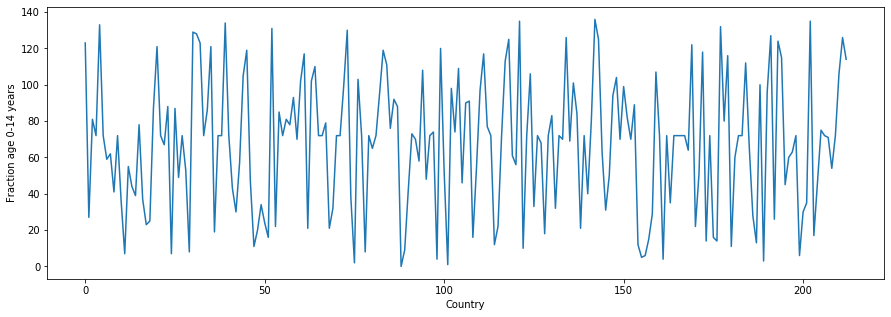

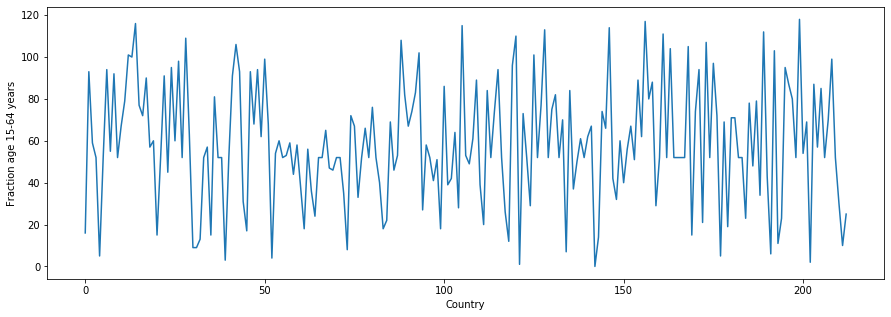

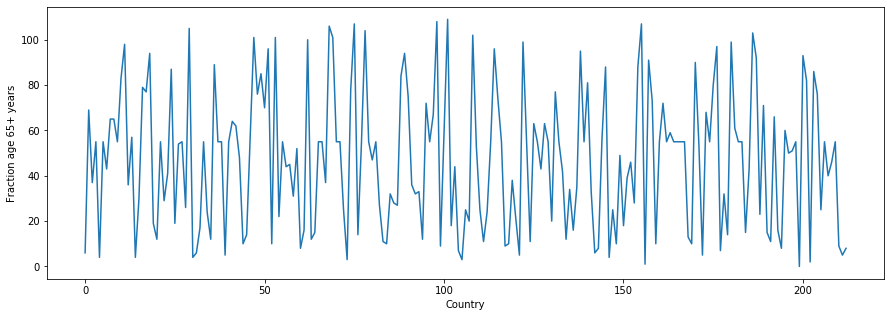

In [172]:
columns=['Fraction age 0-14 years','Fraction age 15-64 years','Fraction age 65+ years']
for i in range(len(columns)):
    fig,ax=plt.subplots(figsize=(15,5))
    sns.lineplot(data=covid_df1,x='Country',y=columns[i])

Date                       AxesSubplot(0.125,0.71587;0.168478x0.16413)
Country                 AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Population              AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Total Tests             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Total Cases               AxesSubplot(0.125,0.518913;0.168478x0.16413)
Total Deaths           AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Total Recovered        AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Serious or Critical    AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Active Cases              AxesSubplot(0.125,0.321957;0.168478x0.16413)
dtype: object

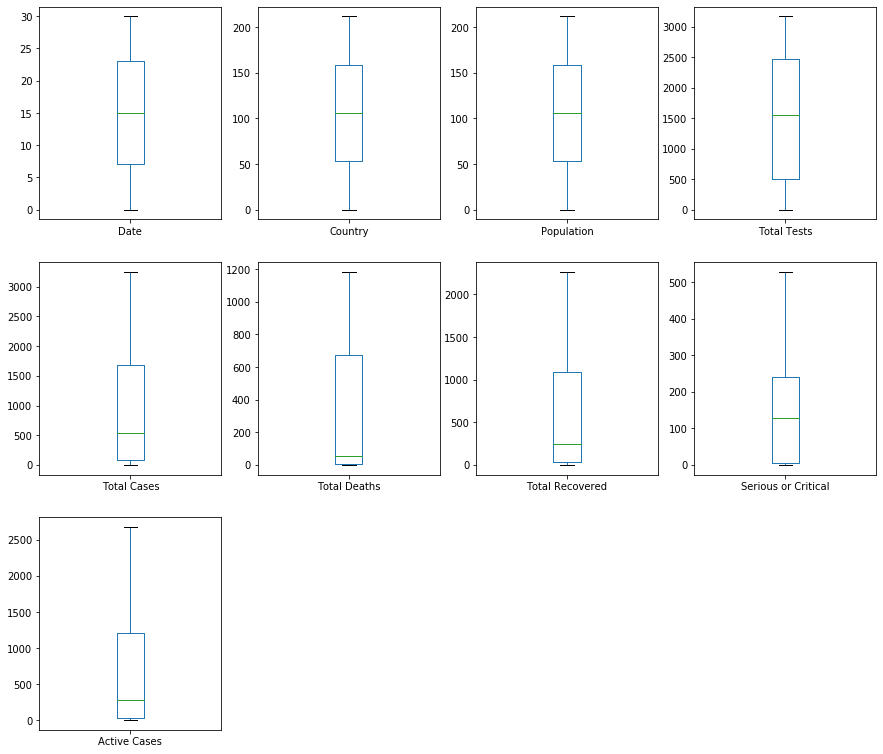

In [173]:
#checking for the outliers
covid_df.plot(kind='box',subplots=True,layout=(4,4),figsize=(15,18))

In [174]:
#removing outliers
z_score=np.abs(zscore(covid_df))
print(covid_df.shape)
covid_df_final=covid_df.loc[(z_score<3).all(axis=1)]
print(covid_df_final.shape)

(6603, 9)
(6594, 9)


In [176]:
#Now separating input and output variable
x=covid_df_final.drop(['Country','Total Deaths','Date'],axis=1)
y=covid_df_final['Total Deaths']
print(x.shape)
print(y.shape)

(6594, 6)
(6594,)


In [213]:
#standardizing the input dataset 
sc=StandardScaler()
x=sc.fit_transform(x)
print(x)

[[ 1.69587909  1.63101278  2.29737978  2.20884235  2.87785393  2.4657106 ]
 [ 1.59817327  1.57630571  1.8404759   1.10247813 -1.0219704   2.15262548]
 [ 1.25620289  1.49474244  2.2130283   2.22654418  2.83846177  2.37964338]
 ...
 [-1.64240315  0.97154389 -0.94211894 -0.86389987  0.81370449 -0.8410171 ]
 [-0.60020772  0.97154389 -0.94312312  1.48159227  0.81370449 -0.83976975]
 [-1.67497176  0.97154389 -0.94312312 -0.86685018  0.81370449 -0.8410171 ]]


In [180]:
#Machine Learning Models
models=[]
models.append(('LR', LinearRegression()))
models.append(('reg_rf', RandomForestRegressor()))

In [181]:
r2_scr_results = []
names = []
for name, model in models:
    print(name)
    max_r2_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.10)
        model_name=model
        model_name.fit(x_train,y_train)
        y_pred=model_name.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("random state: ",r_state," accuracy score: ",r2_scr)
        if r2_scr>max_r2_score:
            max_r2_score=r2_scr      
            final_r_state=r_state
    r2_scr_results.append(max_r2_score*100)
    print()
    print("max accuracy score at random state:",final_r_state," for the model ",name," is: ",max_r2_score)
    print()
    print()

LR
random state:  42  accuracy score:  0.40155644419627334
random state:  43  accuracy score:  0.362910384829076
random state:  44  accuracy score:  0.4214975084616237
random state:  45  accuracy score:  0.37875854647545715
random state:  46  accuracy score:  0.3889362971893432
random state:  47  accuracy score:  0.35111091390450433
random state:  48  accuracy score:  0.4454707882698138
random state:  49  accuracy score:  0.3601243930993029
random state:  50  accuracy score:  0.37338714880600443
random state:  51  accuracy score:  0.40369210974574055
random state:  52  accuracy score:  0.3967392008692425
random state:  53  accuracy score:  0.38960087627129814
random state:  54  accuracy score:  0.399825007272019
random state:  55  accuracy score:  0.33743144546870196
random state:  56  accuracy score:  0.41637073408892655
random state:  57  accuracy score:  0.34701978296619784
random state:  58  accuracy score:  0.3859777598725421
random state:  59  accuracy score:  0.3979114360317806


In [182]:
#cross_val of the models
results = []
names = []
cvs=[]
for name, model in models:
    cv_result=cross_val_score(model, x_train, y_train, cv=2, scoring="r2")
    results.append(cv_result)
    names.append(name)
    print("Model name: ",name)
    print("Cross Validation Score(Mean): ",cv_result.mean())
    cvs.append(cv_result.mean()*100)
    print("Cross Validation Score(Std): ",cv_result.std())
    print()

Model name:  LR
Cross Validation Score(Mean):  0.3782829361391566
Cross Validation Score(Std):  0.0164219072137482

Model name:  reg_rf
Cross Validation Score(Mean):  0.9236361891363636
Cross Validation Score(Std):  0.0017811602151595607



In [185]:
#checking for the best results
result=pd.DataFrame({'Model':names,'Accuracy_Score':r2_scr_results, 'Cross_Validation_Score':cvs})
result

,Model,Accuracy_Score,Cross_Validation_Score
0,LR,46.371423,37.828294
1,reg_rf,97.015467,92.363619


In [186]:
#Choosing the Best Model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.10)
model_name=RandomForestRegressor()
model_name.fit(x_train,y_train)
y_pred_model=model_name.predict(x_test)
r2_scr=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("r2 score: ",r2_scr)
print("mean squared error: ",mse)
print(y_pred_model)

r2 score:  -0.9317774521752167
mean squared error:  215986.23543548558
[4.92630000e+02 6.57833333e+02 6.65280000e+02 2.49800000e+02
 1.87200000e+01 5.25216667e+02 2.00000000e+00 1.00000000e+00
 3.88940000e+02 6.72000000e+02 1.18010000e+03 1.08365000e+03
 6.43000000e+00 5.64790000e+02 3.81900000e+01 1.44600000e+01
 5.80460000e+02 5.91310000e+02 1.79800000e+01 3.97740000e+02
 6.45400000e+01 6.65280000e+02 1.12100000e+01 1.70200000e+01
 2.70920000e+02 1.04966000e+03 6.39310000e+02 9.63000000e+01
 6.50000000e+01 8.33200000e+01 7.76780000e+02 6.12960563e+02
 1.00000000e+00 1.60600000e+01 1.15210000e+02 2.06000000e+01
 1.01000000e+01 1.32000000e+01 6.27410000e+02 3.75910000e+02
 8.92400000e+01 1.17000000e+01 8.44800000e+01 2.21290000e+02
 7.68860000e+02 4.00800000e+01 1.03420000e+02 1.24300000e+01
 6.72000000e+02 2.06000000e+00 9.92200000e+01 6.72000000e+02
 1.06600000e+01 3.12200000e+01 7.71000000e+00 6.72000000e+02
 5.15060000e+02 4.48240000e+01 9.42000000e+00 2.00000000e+00
 1.09800000e+0

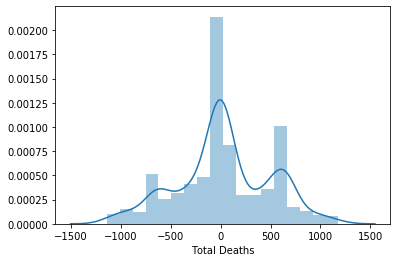

In [187]:
sns.distplot(y_test-y_pred)
plt.show()

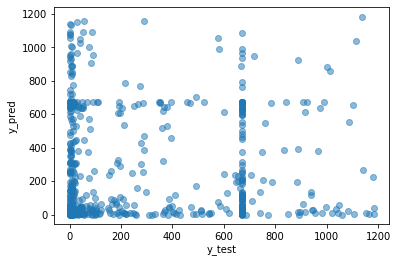

In [188]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [190]:
#saving the model as pickle in a file
pickle.dump(model_name,open('RF_covid_data.pkl','wb'))

In [191]:
#loading the model for testing
loaded_model=pickle.load(open('RF_covid_data.pkl','rb'))
loaded_model.predict(x_test)

array([4.92630000e+02, 6.57833333e+02, 6.65280000e+02, 2.49800000e+02,
       1.87200000e+01, 5.25216667e+02, 2.00000000e+00, 1.00000000e+00,
       3.88940000e+02, 6.72000000e+02, 1.18010000e+03, 1.08365000e+03,
       6.43000000e+00, 5.64790000e+02, 3.81900000e+01, 1.44600000e+01,
       5.80460000e+02, 5.91310000e+02, 1.79800000e+01, 3.97740000e+02,
       6.45400000e+01, 6.65280000e+02, 1.12100000e+01, 1.70200000e+01,
       2.70920000e+02, 1.04966000e+03, 6.39310000e+02, 9.63000000e+01,
       6.50000000e+01, 8.33200000e+01, 7.76780000e+02, 6.12960563e+02,
       1.00000000e+00, 1.60600000e+01, 1.15210000e+02, 2.06000000e+01,
       1.01000000e+01, 1.32000000e+01, 6.27410000e+02, 3.75910000e+02,
       8.92400000e+01, 1.17000000e+01, 8.44800000e+01, 2.21290000e+02,
       7.68860000e+02, 4.00800000e+01, 1.03420000e+02, 1.24300000e+01,
       6.72000000e+02, 2.06000000e+00, 9.92200000e+01, 6.72000000e+02,
       1.06600000e+01, 3.12200000e+01, 7.71000000e+00, 6.72000000e+02,
      